# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [75]:
## Importing the libraries for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Read the dataset from the source file "petrol.csv"

pet= pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency2\Residency2_Lab\petrol.csv', sep=',')
print(pet);

      tax   income   highway     dl   consumption
0    9.00     3571      1976  0.525           541
1    9.00     4092      1250  0.572           524
2    9.00     3865      1586  0.580           561
3    7.50     4870      2351  0.529           414
4    8.00     4399       431  0.544           410
5   10.00     5342      1333  0.571           457
6    8.00     5319     11868  0.451           344
7    8.00     5126      2138  0.553           467
8    8.00     4447      8577  0.529           464
9    7.00     4512      8507  0.552           498
10   8.00     4391      5939  0.530           580
11   7.50     5126     14186  0.525           471
12   7.00     4817      6930  0.574           525
13   7.00     4207      6580  0.545           508
14   7.00     4332      8159  0.608           566
15   7.00     4318     10340  0.586           635
16   7.00     4206      8508  0.572           603
17   7.00     3718      4725  0.540           714
18   7.00     4716      5915  0.724           865


In [76]:
## Statistical degtails of the given dataset

stat_details = pet.describe().transpose();
print (stat_details);

              count         mean          std       min         25%  \
tax            48.0     7.668333     0.950770     5.000     7.00000   
 income        48.0  4241.833333   573.623768  3063.000  3739.00000   
 highway       48.0  5565.416667  3491.507166   431.000  3110.25000   
 dl            48.0     0.570333     0.055470     0.451     0.52975   
 consumption   48.0   576.770833   111.885816   344.000   509.50000   

                    50%         75%        max  
tax              7.5000     8.12500     10.000  
 income       4298.0000  4578.75000   5342.000  
 highway      4735.5000  7156.00000  17782.000  
 dl              0.5645     0.59525      0.724  
 consumption   568.5000   632.75000    968.000  


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [89]:
## Identify Outliers and remove them
 

q1= pet.quantile(.25); q3 = pet.quantile(.75); 
IQR= q3-q1;
mincap= q1-(IQR*1.5); maxcap=q3+(1.5*IQR); 

## To remove outliers

pet1 = pet[~((pet < mincap) | (pet> maxcap)).any(axis=1)]

## Without outliers
print (pet1);




     tax   income   highway     dl   consumption
0   9.00     3571      1976  0.525           541
1   9.00     4092      1250  0.572           524
2   9.00     3865      1586  0.580           561
3   7.50     4870      2351  0.529           414
4   8.00     4399       431  0.544           410
6   8.00     5319     11868  0.451           344
7   8.00     5126      2138  0.553           467
8   8.00     4447      8577  0.529           464
9   7.00     4512      8507  0.552           498
10  8.00     4391      5939  0.530           580
12  7.00     4817      6930  0.574           525
13  7.00     4207      6580  0.545           508
14  7.00     4332      8159  0.608           566
15  7.00     4318     10340  0.586           635
16  7.00     4206      8508  0.572           603
17  7.00     3718      4725  0.540           714
19  8.50     4341      6010  0.677           640
20  7.00     4593      7834  0.663           649
21  8.00     4983       602  0.602           540
22  9.00     4897   

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

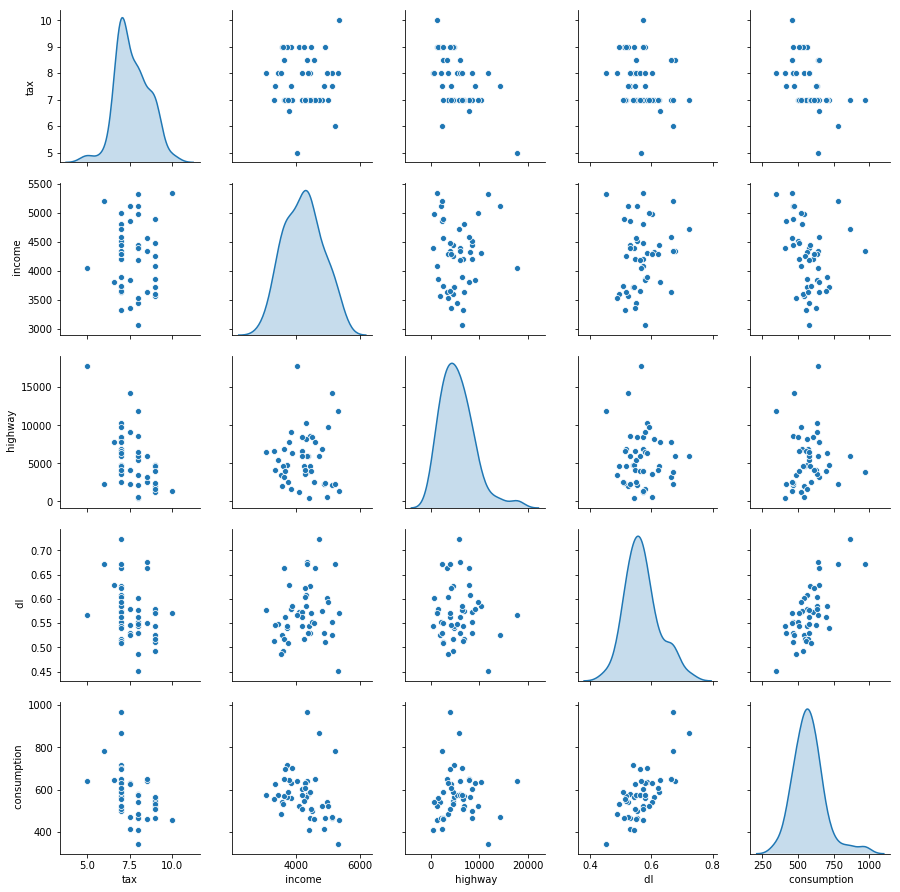

In [83]:
## Plotting Correlation pair plot to analyse the correlation of consumption with independent variables

import seaborn as sns
pet1 = pet.iloc[:,0:6];
sns.pairplot(pet1, diag_kind='kde') 

In [166]:
# From the above graph, we notice the following
# there's a linear relationship between the proportion of drivers and consumption (positve correlation as the slope of the graph tends to be on the posive side) )
# there's a non-linear relationship between Consumption and Highway as well as Consumption and income
# While consumption decreases when Tax increases

# Individually find out correlation to determine the relationship between dependent and independent variable

# Between Consumption and Proportion of drivers
c1= pet1[' consumption'].corr(pet1[' dl']); print (c1);

# Between Consumption and Highway
c2=pet1[' consumption'].corr(pet1[' highway']); print (c2);

# Betwen Consumption and Income
c3=pet1[' consumption'].corr(pet1[' income']); print (c3);

# Betwen Consumption and Tax
c4=pet1[' consumption'].corr(pet1['tax']); print (c4);

# Also, from the above correlation values, we see that the variable "proportion of drivers" is a good predictor of Consumption
# Tax has a negative association with Consumption
# Other variables do not seem to provide a high correlation with the dependent variable

0.6117880063947397
0.03430885028863911
-0.34732558868059754
-0.44611573625825673


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [197]:
# Divide into X and Y sets
# Since "Consumption" is a dependent variable, we need to drop it in the X dataframe
# Adding "Proportion of Drivers" and "Tax" to the X frame as other variables do not seem to be a good indicator of Consumption

from sklearn.model_selection import train_test_split

X= pet1.drop(columns=[' consumption', ' income', ' highway'], axis=1);
Y= pet1[' consumption'];




# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [198]:
## Reshaping the Y frame for model prediction

## Splitting into 80:20 ratio for training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

(34, 2) (9, 2)
(34,) (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [214]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

## Finding the coefficients of each feature

  
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
print (coeff)


# Intercept
print ("Y Intercept is", lr.intercept_);





     Coefficient
tax   -30.709243
 dl   892.886209
Y Intercept is 292.55096524614896


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [205]:
## Predicting Y for the test dataset

Y_pred= lr.predict(X_test);

## predict Y for the training dataset

Y_predt= lr.predict(X_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_training = lr.score(X_train, Y_train);
accuracy_Score_test = lr.score(X_test,Y_test);
print ("Accuracy in percent of training set",accuracy_Score_training*100);
print ("Accuracy in percent of test set",accuracy_Score_test*100);

## Validating with other methods such as R2, Root Mean Squares

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

## Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
## Root Mean Squared Error
rmse = sqrt(mse);
print ("Root Mean Squared Error of test set", rmse);
## R^2 Score

Rscore= r2_score(Y_test, Y_pred);
print ("R2 error of test set", Rscore);

Accuracy in percent of training set 46.57867429910155
Accuracy in percent of test set 28.76056314158515
Root Mean Squared Error of test set 69.02352698398606
R2 error of test set 0.2876056314158515


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [208]:
# Divide into X and Y sets
# Since "Consumption" is a dependent variable, we need to drop it in the X dataframe
# Adding "Highway" and "Income" features to the X frame
from sklearn.model_selection import train_test_split

X1= pet1.drop(columns=[' consumption'], axis=1);
Y1= pet1[' consumption'];

## Splitting into 80:20 ratio for training and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)

## training the model
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)


## Predicting Y for the test dataset

Y1_pred= lr1.predict(X1_test);

## predict Y for the training dataset

Y1_predt= lr1.predict(X1_train);

## Accuracy Score for the model

from sklearn.metrics import accuracy_score;
accuracy_Score_train = lr1.score(X1_train, Y1_train);
accuracy_Score_tst = lr1.score(X1_test,Y1_test);
print ("Accuracy in percent of training set",accuracy_Score_train*100);
print ("Accuracy in percent of test set",accuracy_Score_tst*100);

## Validating with other methods such as R2, Root Mean Squares

## Mean Squared Error
mse1 = mean_squared_error(Y1_test, Y1_pred)
## Root Mean Squared Error
rmse1 = sqrt(mse1);
print ("Root Mean Squared Error of test set", rmse1);
## R^2 Score

Rscore1= r2_score(Y1_test, Y1_pred);
print ("R2 error of test set", Rscore1);


Accuracy in percent of training set 64.07622941321002
Accuracy in percent of test set 69.30212207091809
Root Mean Squared Error of test set 45.309689468984025
R2 error of test set 0.6930212207091808


# Question 9: Print the coefficients of the multilinear regression model

In [213]:
## Finding the coefficients of each feature

  
coeff1 = pd.DataFrame(lr1.coef_, X1.columns, columns=['Coefficient'])  
print (coeff1)


# Intercept
print ("Y Intercept is", lr1.intercept_);


          Coefficient
tax        -39.411584
 income     -0.062628
 highway    -0.003022
 dl        950.882744
Y Intercept is 607.7189089086938


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# First Model without two features "Income" and "Highway" - R2 was 0.28
# Second model with two additional featues - R2 was 0.69

# R2 is the extent to which the independent variables determine the variation in a dependent variable in a linear regression.
# Hence, increase in the number of independent variables always increases the R2 value in the model.
# However, R2 method does not ignore the independent variables even if they don't contribute significantly to the prediction of the dependent variable
# Adjusted R2 method better estimates the score especially for multivariate anaysis.